In [ ]:
#ECE 219 Project 2

import numpy as np
np.random.seed(42)

import random
random.seed(42)

import nltk, string
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups

In [ ]:
categories = ['comp.sys.ibm.pc.hardware', 'comp.graphics','comp.sys.mac.hardware', 'comp.os.ms-windows.misc','rec.autos', 'rec.motorcycles','rec.sport.baseball', 'rec.sport.hockey']
dataset = fetch_20newsgroups(subset = 'all', categories = categories, shuffle = True, random_state = 42, remove=('headers', 'footers'))

Question #1 Report the dimensions of the TF-IDF matrix you get

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#TF-IDF Vector
Tfidf_Vector = TfidfVectorizer(stop_words = 'english', min_df = 3)

#TF-IDF Matrix
Tfidf_Matrix = Tfidf_Vector.fit_transform(dataset.data)

print("TF-IDF Matrix shape: ", Tfidf_Matrix.shape)


TF-IDF Matrix shape:  (7882, 27768)


Question #2 Report the contingency table of your clustering result

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix, homogeneity_score, v_measure_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score

g_truth = [int(i/4) for i in dataset.target]

#K-Mean Clustering

kmean = KMeans(n_clusters = 2, random_state = 0, max_iter = 1000, n_init = 900)
kmean_predict = kmean.fit_predict(Tfidf_Matrix)
contin_matrix = contingency_matrix(g_truth, kmean_predict)



print("Contingency Table: ", contin_matrix)

Contingency Table:  [[   4 3899]
 [1718 2261]]


Does the contingency matrix have to be square-shaped? 

No, if the dataset is balanced i.e. if the number of unique labels which if they only appear at least once in both the true and predicted labels then the matrix will be square-shaped
 

Question# 3 : Report the 5 clustering measures explained in the introduction for Kmeans clustering.


In [ ]:
print("Homogeneity score: ", homogeneity_score(g_truth,kmean_predict))
print("Completeness score: ",completeness_score(g_truth,kmean_predict))
print("V-measure score: ",v_measure_score(g_truth,kmean_predict))
print("Adjusted Rand score: ",adjusted_rand_score(g_truth,kmean_predict))
print("Adjusted mutual information score: ",adjusted_mutual_info_score(g_truth,kmean_predict))

Homogeneity score:  0.2535958928926043
Completeness score:  0.334815748824373
V-measure score:  0.28860033608397917
Adjusted Rand score:  0.18076179588914548
Adjusted mutual information score:  0.2885262076813762


Question #4: Report the plot of the percentage of variance that the top r principle components retain v.s. r, for r = 1 to 1000.

Text(0, 0.5, 'Total Explained Variance')

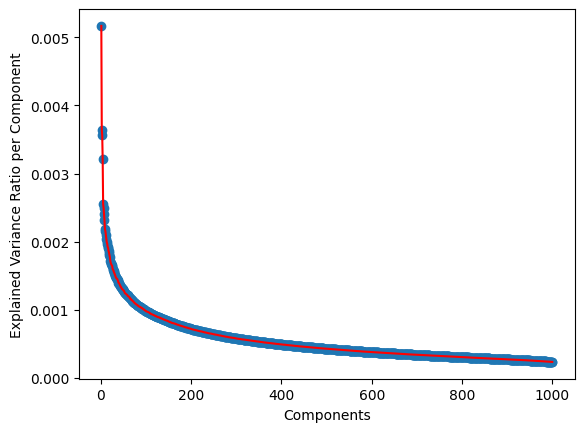

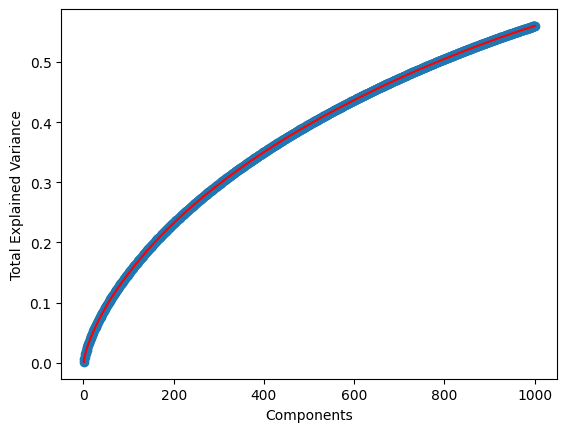

In [ ]:
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=1000, random_state=42)
svd_train_matrix = SVD.fit_transform(Tfidf_Matrix)

#Plotting per component ration explained variance
plt.figure()
plt.plot(np.arange(1000)+1,sorted(SVD.explained_variance_ratio_,reverse=True), color = 'red')
plt.scatter(np.arange(1000)+1,sorted(SVD.explained_variance_ratio_,reverse=True))
plt.xlabel("Components"); plt.ylabel("Explained Variance Ratio per Component")

plt.figure()
plt.plot(np.arange(1000)+1,np.cumsum(SVD.explained_variance_ratio_), color = 'red')
plt.scatter(np.arange(1000)+1,np.cumsum(SVD.explained_variance_ratio_))
plt.xlabel("Components"); plt.ylabel("Total Explained Variance")

Question #5: Let r be the dimension that we want to reduce the data to (i.e. n components). Try r = 1 − 10, 20, 50, 100, 300, and plot the 5 measure scores v.s. r for both SVD and NMF. Report a good choice of r for SVD and NMF respectively.


In [ ]:

#Dense representation for better K-Means clustering for SVD
r = [1,2,3,4,5,6,7,8,9,10,20,50,100,300]
h_score = []
complete_score = []
v_meas_score = []
adj_rand_score = []
adj_mut_info_score = []

for i in r:
  kmean_predict = kmean.fit_predict(TruncatedSVD(n_components = i, random_state = 42).fit_transform(Tfidf_Matrix))
  h_score.append(homogeneity_score(g_truth, kmean_predict))
  complete_score.append(completeness_score(g_truth, kmean_predict))
  v_meas_score.append(v_measure_score(g_truth, kmean_predict))
  adj_rand_score.append(adjusted_rand_score(g_truth, kmean_predict))
  adj_mut_info_score.append(adjusted_mutual_info_score(g_truth, kmean_predict))




SVD
[0.00029275270509964866, 0.5783435715006476, 0.3955833570796594, 0.23077459282815302, 0.22152006534780616, 0.22134571730585592, 0.22650374244011012, 0.23533599817531964, 0.23355999485418594, 0.23462501869262953, 0.23622580967999646, 0.24162603939083188, 0.2459136851918752, 0.242488600144672]
[0.000297122118721392, 0.580917055004891, 0.43497359643597727, 0.3118486033869298, 0.30983180430366425, 0.3096996360878299, 0.3151055170263669, 0.3217540167156483, 0.3204169401876307, 0.3212187345416125, 0.32242397160243236, 0.3257637898975148, 0.32972145379678475, 0.32714066941714903]
[0.00029492122900643043, 0.5796274567694232, 0.4143444101956275, 0.26525491343765195, 0.25833714137938557, 0.25817263124945866, 0.2635574544656232, 0.2718422540943059, 0.27017940339255475, 0.2711767512281033, 0.27267481812015304, 0.27745655726190943, 0.28171670663624065, 0.2785246026362978]
[0.0003281607588681523, 0.6741826502926531, 0.3873449926208739, 0.16165375949825153, 0.14496247678573435, 0.1447692431491946

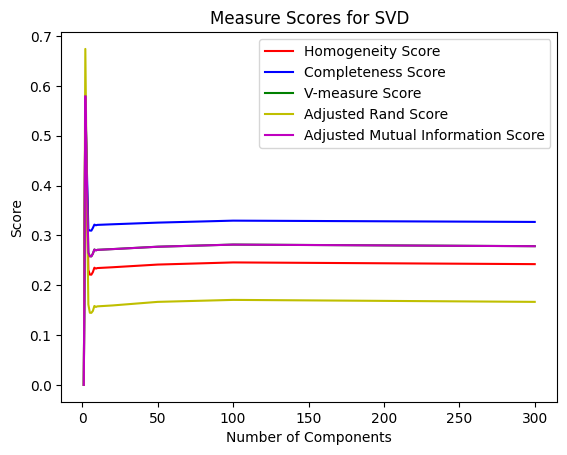

In [ ]:
#Plotting the SVD representation for better K-Means clustering
figure, axis = plt.subplots()
axis.plot(r,h_score, 'r', label='Homogeneity Score')
axis.plot(r, complete_score, 'b', label='Completeness Score')
axis.plot(r, v_meas_score, 'g', label='V-measure Score')
axis.plot(r,adj_rand_score,'y',label='Adjusted Rand Score')
axis.plot(r,adj_mut_info_score,'m',label='Adjusted Mutual Information Score')
axis.legend(loc='best')
plt.xlabel("Number of Components")
plt.ylabel("Score")
plt.title("Measure Scores for SVD")
print("SVD")
print(h_score)
print(complete_score)
print(v_meas_score)
print(adj_rand_score)
print(adj_mut_info_score)

In [ ]:
from sklearn.decomposition import NMF

#Dense representation for better K-Means clustering for NMF
r = [1,2,3,4,5,6,7,8,9,10,20,50,100,300]
h_score = []
complete_score = []
v_meas_score = []
adj_rand_score = []
adj_mut_info_score = []

for i in r:
    kmean_predict = kmean.fit_predict(NMF(n_components = i, init='random', random_state = 42).fit_transform(Tfidf_Matrix))
    h_score.append(homogeneity_score(g_truth, kmean_predict))
    complete_score.append(completeness_score(g_truth, kmean_predict))
    v_meas_score.append(v_measure_score(g_truth, kmean_predict))
    adj_rand_score.append(adjusted_rand_score(g_truth, kmean_predict))
    adj_mut_info_score.append(adjusted_mutual_info_score(g_truth, kmean_predict))

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF
[0.0003003030178761853, 0.5805753930376047, 0.027821445485245826, 0.587789861054105, 0.37562649312171553, 0.481718302025247, 0.19856312433897183, 0.12558967881293798, 0.09370119529095496, 0.09267200875838809, 0.0019120402724064785, 0.008734874759382975, 0.003444719931676562, 0.002163728856299646]
[0.0003047688479979988, 0.5975327335863215, 0.15578046049570043, 0.5954542042989095, 0.4332454920035562, 0.5186205621085457, 0.2924010996531881, 0.2419108709729696, 0.2168568758993194, 0.21597065707166085, 0.0025441502068279777, 0.013232995618956961, 0.005663833745154288, 0.0032608953501375862]
[0.0003025194525487269, 0.5889320238352856, 0.04721124833853736, 0.5915972101740776, 0.40238378337923136, 0.4994887743177672, 0.23651448749233192, 0.1653412959765774, 0.13085957419138464, 0.129693246200255, 0.0021832628911060627, 0.01052341965173116, 0.004283955869143768, 0.0026013574758204493]
[0.0003390408027462719, 0.6319404637555089, 0.003927942257354733, 0.6716845691595854, 0.34200153146083623,

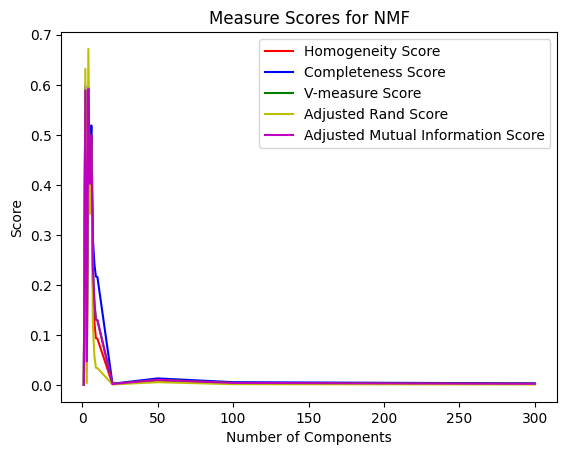

In [ ]:
#Plotting the NMF representation for better K-Means clustering
figure, axis = plt.subplots()
axis.plot(r,h_score, 'r', label='Homogeneity Score')
axis.plot(r, complete_score, 'b', label='Completeness Score')
axis.plot(r, v_meas_score, 'g', label='V-measure Score')
axis.plot(r,adj_rand_score,'y',label='Adjusted Rand Score')
axis.plot(r,adj_mut_info_score,'m',label='Adjusted Mutual Information Score')
axis.legend(loc='best')
plt.xlabel("Number of Components")
plt.ylabel("Score")
plt.title("Measure Scores for NMF")
print("NMF")
print(h_score)
print(complete_score)
print(v_meas_score)
print(adj_rand_score)
print(adj_mut_info_score)

Question #6:
The measures exhibit a non-monotonic trend as r grows, showing an initial peak followed by a decrease and then stabilization. This pattern is observed across all measures, as the number of components increases and the dimensions for k-means clustering expand. Due to the Euclidean distance metric's unsuitability in high dimensions, k-means is known to suffer from the curse of dimensionality, as the nearest and farthest points converge in distance. Consequently, clustering becomes difficult, and increasing the number of components beyond the elbow point does not provide additional information to the k-means algorithm. Consequently, the measures do not change beyond the elbow point, as no new information is provided to the algorithm.

Question #7:
On average, they are minisucly better doing a one by one comparison

Question #8:
Visualize the clustering results for:
• SVD with your optimal choice of r for K-Means clustering;
• NMF with your choice of r for K-Means clustering.

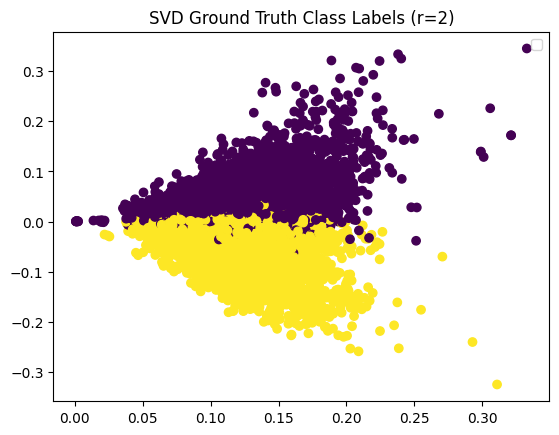

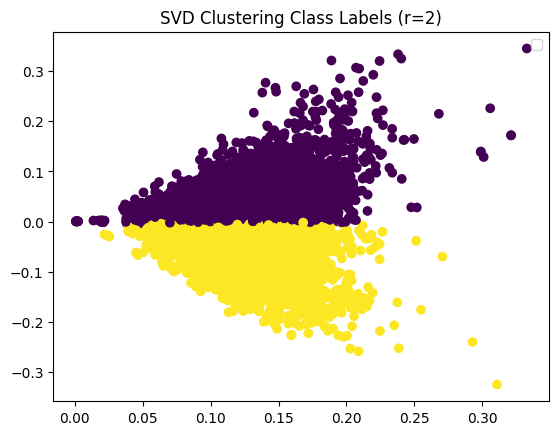

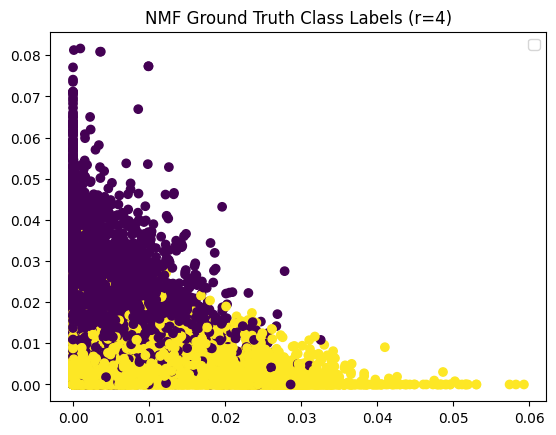

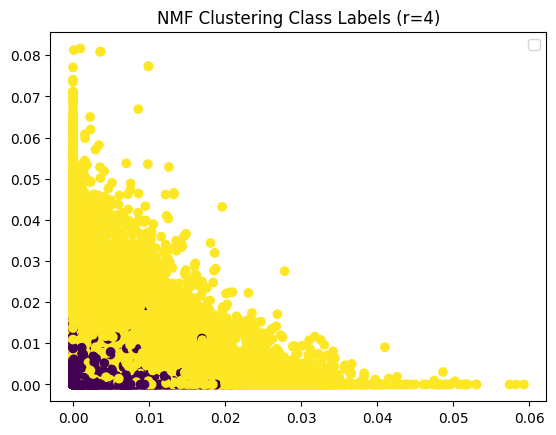

In [ ]:
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans


Best_SVD = 2
Best_NMF = 4


Reduced_data_SVD = TruncatedSVD(n_components = Best_SVD, random_state=0).fit_transform(Tfidf_Matrix)
plt.figure()
plt.scatter(Reduced_data_SVD[:,0], Reduced_data_SVD[:,1], c = g_truth, cmap = 'viridis')
plt.title("SVD Ground Truth Class Labels (r=2)")
plt.legend()


kmean = KMeans(n_clusters = 2, random_state = 0, max_iter = 1000, n_init = 900)
Labels_SVD = kmean.fit_predict(Reduced_data_SVD)
plt.figure()
plt.scatter(Reduced_data_SVD[:,0], Reduced_data_SVD[:,1], c = Labels_SVD, cmap = 'viridis')
plt.title("SVD Clustering Class Labels (r=2)")
plt.legend()

Reduced_data_NMF = NMF(n_components = Best_NMF, init = 'random', random_state = 0).fit_transform(Tfidf_Matrix)
plt.figure()
plt.scatter(Reduced_data_NMF[:,0], Reduced_data_NMF[:,1], c = g_truth, cmap='viridis')
plt.title("NMF Ground Truth Class Labels (r=4)")
plt.legend()

NMF_Labels = kmean.fit_predict(Reduced_data_NMF)
plt.figure()
plt.scatter(Reduced_data_NMF[:,0], Reduced_data_NMF[:,1], c = NMF_Labels, cmap='viridis')
plt.title("NMF Clustering Class Labels (r=4)")
plt.legend()




Question #9